<a href="https://colab.research.google.com/github/ravi23796/AV_JanataHack_Loan_Pred/blob/master/AV_ML_Loan_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Import Libraries
#----------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import time,re
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_curve
from sklearn.linear_model import LogisticRegression

%matplotlib inline
warnings.filterwarnings('ignore')

In [10]:
#Mounting the Google Drive to the Colab
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
%mkdir -p /root/AnalyticsVidhya
!ln -s /content/gdrive/My\ Drive/AnalyticsVidhya/1_Loan_Prediction/ /root/AnalyticsVidhya

#Navigate to the Directory
%cd /root/AnalyticsVidhya/1_Loan_Prediction/
%ls

Mounted at /content/gdrive
ln: failed to create symbolic link '/root/AnalyticsVidhya/1_Loan_Prediction': File exists
/content/gdrive/My Drive/AnalyticsVidhya/1_Loan_Prediction
 Exercise.ipynb                       submission_1596105768.csv
 Program.ipynb                        submission_1596106119.csv
'sample_submission_49d68Cx (1).csv'   submission_1596106191.csv
 sample_submission_49d68Cx.csv        submission_1596106832.csv
 submission_1596083641.csv            submission_1596107074.csv
 submission_1596083931.csv            submission_1596115241.csv
 submission_1596084075.csv            submission_1596115415.csv
 submission_1596084194.csv            submission_1596115490.csv
 submission_1596086181.csv           'test_lAUu6dG (1).csv'
 submission_1596086943.csv            test_lAUu6dG.csv
 submission_1596101187.csv            train_ctrUa4K.csv
 submission_1596105481.csv


In [11]:
#Load Dataset
#------------
train=pd.read_csv('train_ctrUa4K.csv')
test=pd.read_csv('test_lAUu6dG.csv')

train_orig=train.copy()
test_orig=test.copy()

#Train Dataset Analysis
#----------------------
print("Train Shape : ",train.shape)
print("Test Shape : ",test.shape)
print()

print("Train Columns")
print("----- -------")
print(train.columns)
print()

print("Train Datatypes")
print("----- ---------")
print(train.dtypes)
print()

print("Train Details")
print("----- -------")
train.describe()

Train Shape :  (614, 13)
Test Shape :  (367, 12)

Train Columns
----- -------
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Train Datatypes
----- ---------
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Train Details
----- -------


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


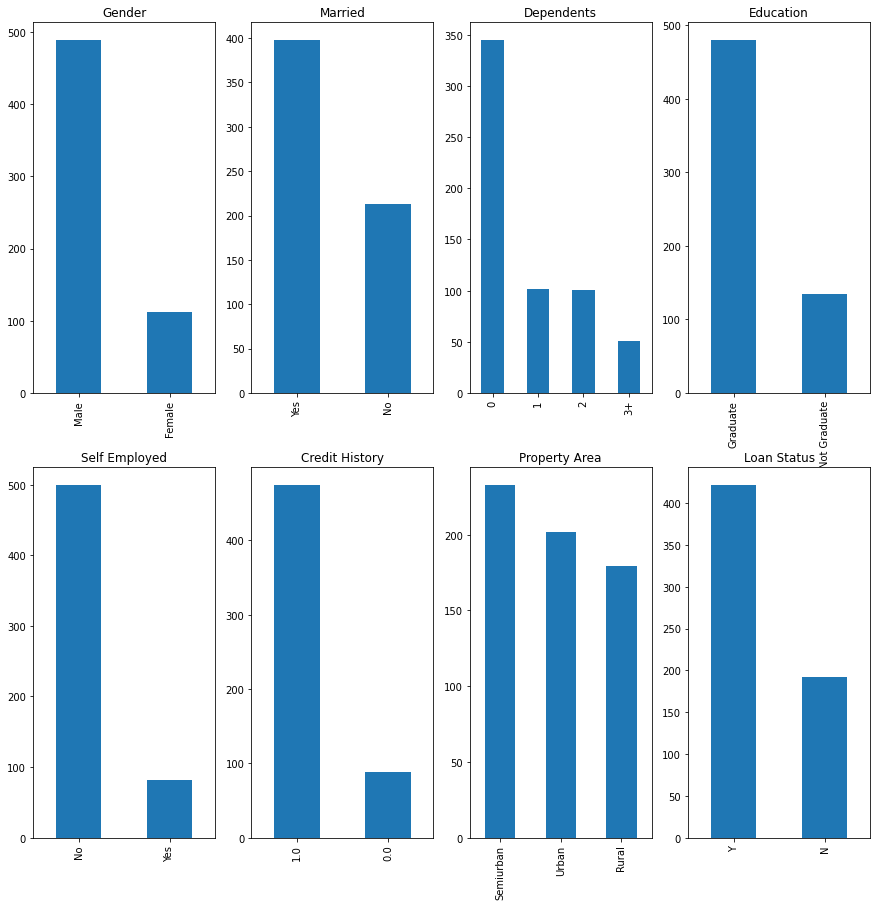

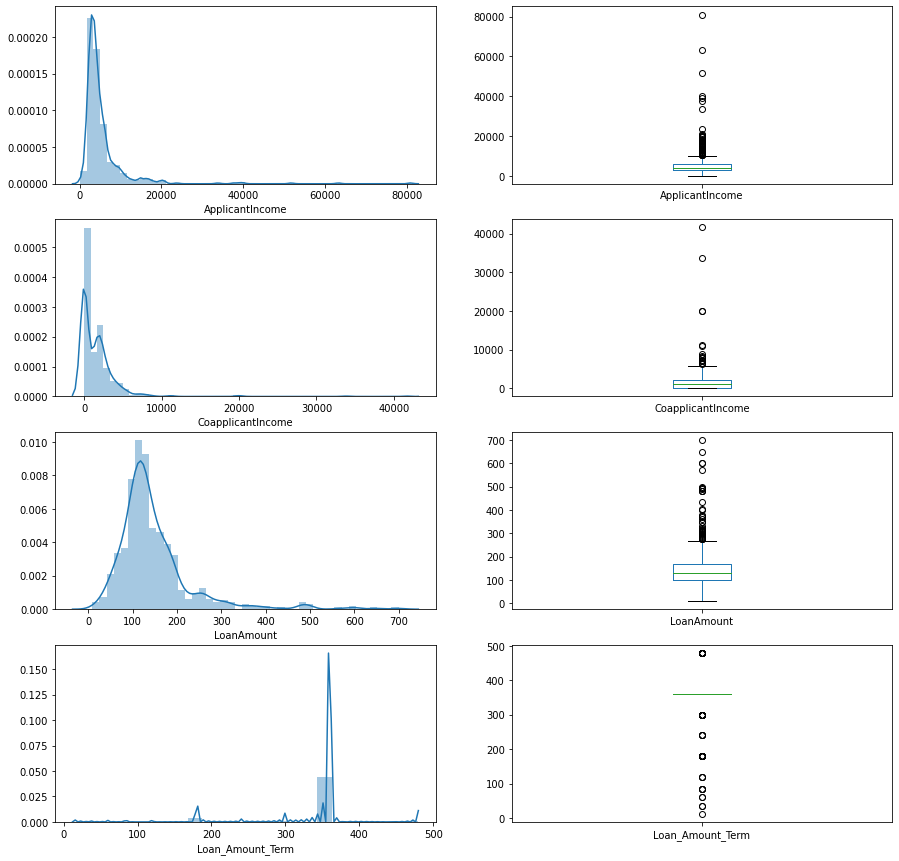

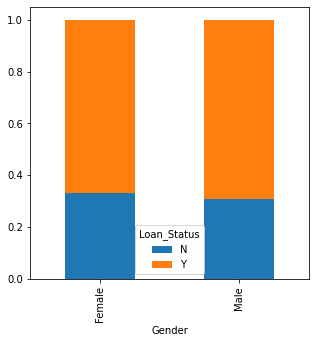

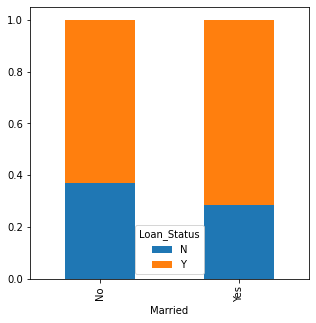

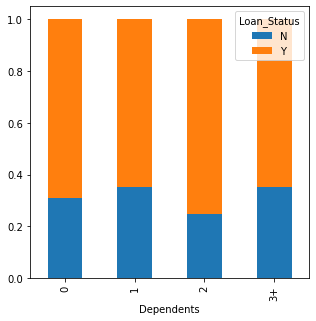

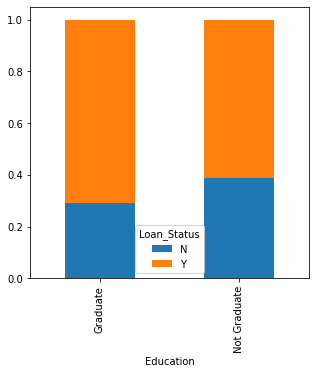

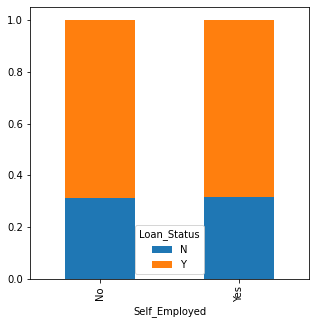

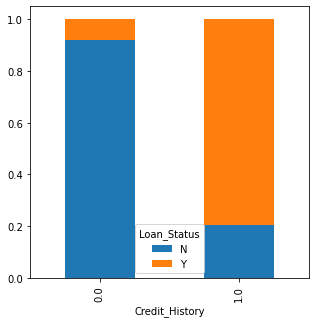

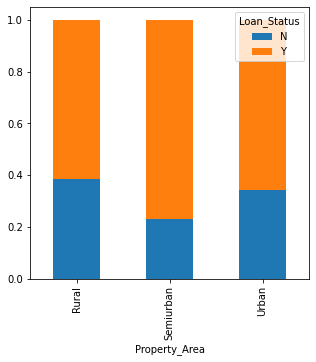

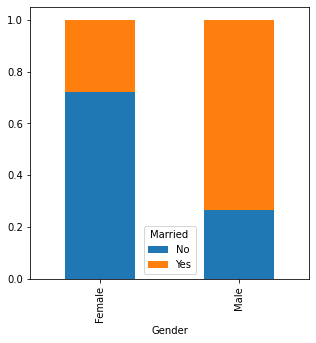

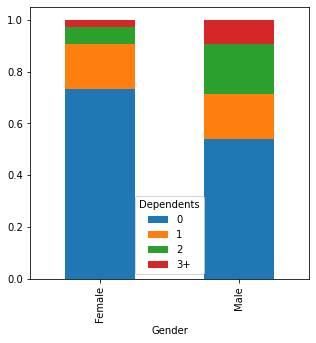

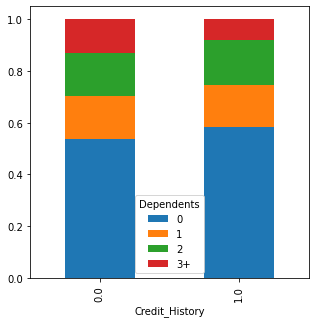

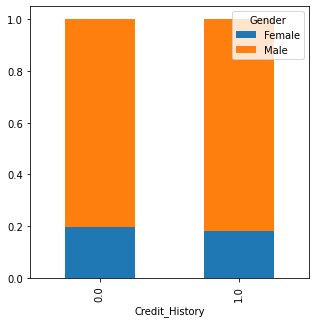

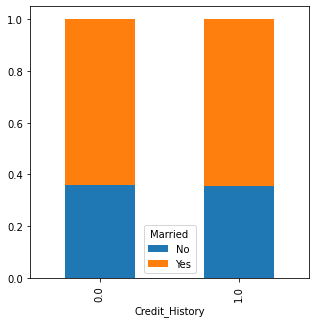

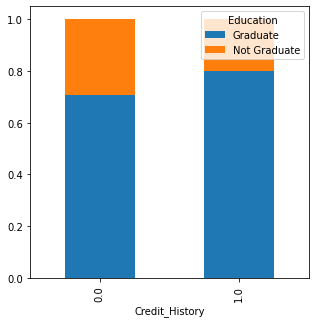

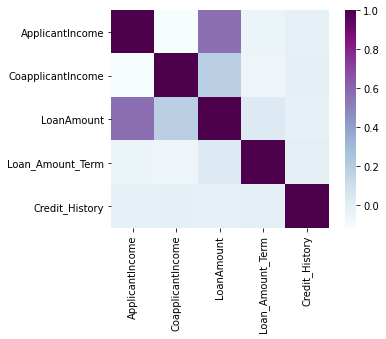

In [12]:
#Univariate Analysis
#---------- --------

#Categorical Variables
plt.figure(1)

plt.subplot(241)
train['Gender'].value_counts().plot.bar(figsize=(15,15),title="Gender")

plt.subplot(242)
train['Married'].value_counts().plot.bar(figsize=(15,15),title="Married")

plt.subplot(243)
train['Dependents'].value_counts().plot.bar(figsize=(15,15),title="Dependents")

plt.subplot(244)
train['Education'].value_counts().plot.bar(figsize=(15,15),title="Education")

plt.subplot(245)
train['Self_Employed'].value_counts().plot.bar(figsize=(15,15),title="Self Employed")

plt.subplot(246)
train['Credit_History'].value_counts().plot.bar(figsize=(15,15),title="Credit History")

plt.subplot(247)
train['Property_Area'].value_counts().plot.bar(figsize=(15,15),title="Property Area")

plt.subplot(248)
train['Loan_Status'].value_counts().plot.bar(figsize=(15,15),title="Loan Status")

#Numerical Variables
plt.figure(2)

plt.subplot(421)
sns.distplot(train['ApplicantIncome'])
plt.subplot(422)
train['ApplicantIncome'].plot.box(figsize=(15,15))

plt.subplot(423)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(424)
train['CoapplicantIncome'].plot.box(figsize=(15,15))

plt.subplot(425)
sns.distplot(train['LoanAmount'])
plt.subplot(426)
train['LoanAmount'].plot.box(figsize=(15,15))

plt.subplot(427)
sns.distplot(train['Loan_Amount_Term'])
plt.subplot(428)
train['Loan_Amount_Term'].plot.box(figsize=(15,15))

#Bivariate Analysis
#--------- --------
#Categorical Variables
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

#BiVariate Analysis : Independent vs Independent Variable
#--------------------------------------------------------
#Categorical Variables
Gender_Married=pd.crosstab(train['Gender'],train['Married'])
Gender_Married.div(Gender_Married.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

Gender_Dependents=pd.crosstab(train['Gender'],train['Dependents'])
Gender_Dependents.div(Gender_Dependents.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

Credit_History_Dependents=pd.crosstab(train['Credit_History'],train['Dependents'])
Credit_History_Dependents.div(Credit_History_Dependents.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

Credit_History_Gender=pd.crosstab(train['Credit_History'],train['Gender'])
Credit_History_Gender.div(Credit_History_Gender.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

Credit_History_Married=pd.crosstab(train['Credit_History'],train['Married'])
Credit_History_Married.div(Credit_History_Married.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

Credit_History_Education=pd.crosstab(train['Credit_History'],train['Education'])
Credit_History_Education.div(Credit_History_Education.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

#Heatmap
#-------
matrix = train.corr() 
plt.subplots() 
sns.heatmap(matrix, square=True, cmap="BuPu");

In [13]:
#Convert Variables into proper datatypes
#---------------------------------------
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

train['ApplicantIncome'].replace(0,1,inplace=True)
test['ApplicantIncome'].replace(0,1,inplace=True)

train['CoapplicantIncome'].replace(0,1,inplace=True)
test['CoapplicantIncome'].replace(0,1,inplace=True)

#Missing Values Treatment
#------------------------
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)

train['Married'].fillna(train['Married'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)

train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)

train['Education'].fillna(train['Education'].mode()[0],inplace=True)
test['Education'].fillna(test['Education'].mode()[0],inplace=True)

train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)

train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

print(train.isna().sum())
print(test.isna().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [14]:
#Remove Loan_ID
#--------------
try:
    train=train.drop('Loan_ID',axis=1) 
    test=test.drop('Loan_ID',axis=1)
    print("ID Column is dropped")
except:
    print("Column isn't existing")
print()
print("Present Columns:")
print(train.columns) 

#Update the Category Variables
#-----------------------------
X=train.drop('Loan_Status',axis=1)
y=train.Loan_Status

try:
  X['Credit_History']=X['Credit_History'].astype(object)
  test['Credit_History']=test['Credit_History'].astype(object)
except:
  print("Already Credit History Updation done")
  
X=pd.get_dummies(X)
test=pd.get_dummies(test)

print("Train Shape : ",X.shape)
print("Test Shape : ",test.shape)
print()

print("Train Columns")
print("----- -------")
print(X.columns)
print()

print("Train Datatypes")
print("----- ---------")
print(X.dtypes)
print()

print("Test Columns")
print("----- -------")
print(test.columns)
print()

print("Test Datatypes")
print("----- ---------")
print(test.dtypes)
print()

print("Train Details")
print("----- -------")
X.describe()

ID Column is dropped

Present Columns:
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Train Shape :  (614, 21)
Test Shape :  (367, 21)

Train Columns
----- -------
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_3', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_0.0',
       'Credit_History_1.0', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

Train Datatypes
----- ---------
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.690423,145.752443,342.410423,0.182410,0.817590,0.346906,0.653094,0.083062,0.586319,0.166124,0.164495,0.781759,0.218241,0.866450,0.133550,0.144951,0.855049,0.291531,0.379479,0.328990
std,6109.041673,2926.001661,84.107233,64.428629,0.386497,0.386497,0.476373,0.476373,0.276201,0.492894,0.372495,0.371027,0.413389,0.413389,0.340446,0.340446,0.352339,0.352339,0.454838,0.485653,0.470229
min,150.000000,1.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,1.000000,100.250000,360.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


KeyError: ignored

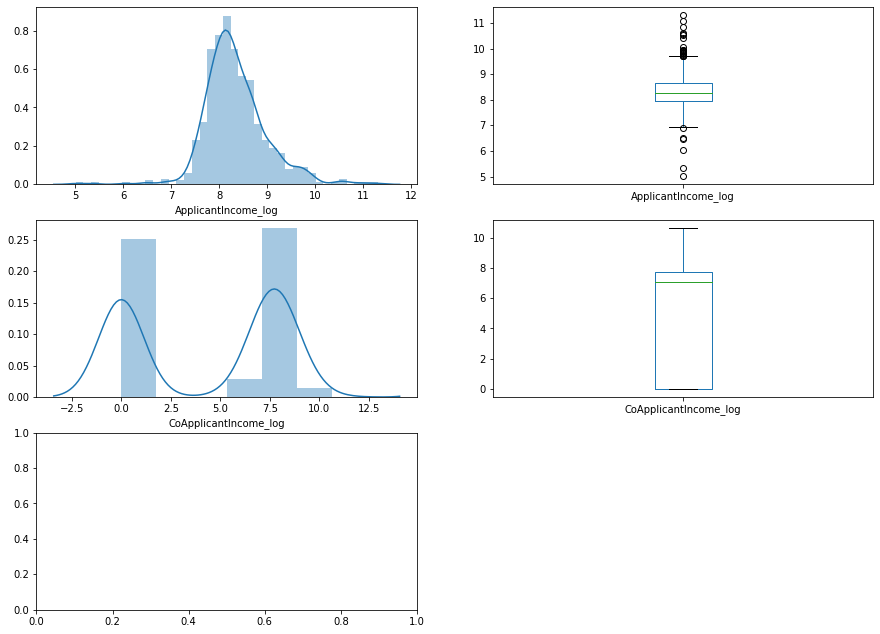

In [15]:
#Variable Transformation
#-------- --------------
#Numerical Variables
X['ApplicantIncome_log']=np.log(X['ApplicantIncome'])
test['ApplicantIncome_log']=np.log(test['ApplicantIncome'])

X['CoApplicantIncome_log']=np.log(X['CoapplicantIncome'])
test['CoApplicantIncome_log']=np.log(test['CoapplicantIncome'])

#X['LoanAmount_log']=np.log(X['LoanAmount'])
#test['LoanAmount_log']=np.log(test['LoanAmount'])

'''
try:
  X=X.drop('ApplicantIncome',axis=1)
  test=test.drop('ApplicantIncome',axis=1)

  X=X.drop('CoapplicantIncome',axis=1)
  test=test.drop('CoapplicantIncome',axis=1)

  X=X.drop('LoanAmount',axis=1)
  test=test.drop('LoanAmount',axis=1)
except:
  print('Already Deleted')
'''
plt.figure(2)

plt.subplot(421)
sns.distplot(X['ApplicantIncome_log'])
plt.subplot(422)
X['ApplicantIncome_log'].plot.box(figsize=(15,15))

plt.subplot(423)
sns.distplot(X['CoApplicantIncome_log'])
plt.subplot(424)
X['CoApplicantIncome_log'].plot.box(figsize=(15,15))

plt.subplot(427)
sns.distplot(train['Loan_Amount_Term'])
plt.subplot(428)
train['Loan_Amount_Term'].plot.box(figsize=(15,15))

In [31]:
def fit_model(X,y,test,model_name,maxdepth=10):
  i=1
  kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
  print("Creating Model......")
  for train_index,cv_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    X_train,X_cv = X.loc[train_index],X.loc[cv_index]
    y_train,y_cv = y[train_index],y[cv_index]

    if (model_name=='Logistic Regression'):
      model=LogisticRegression(random_state=1)   
    elif (model_name=='Random Forest'):
      model=RandomForestClassifier(random_state=1,max_depth=maxdepth)
      
    model.fit(X_train,y_train)
    pred_cv=model.predict(X_cv)
    print("Validation Accuracy : ", accuracy_score(y_cv,pred_cv))
    print()
    i+=1
   
  pred_test=model.predict(test)
  print("Prediction in Test Data Done successfully")
  if(model_name == 'Random Forest'):
    feature_importances=pd.Series(model.feature_importances_,index=X.columns)
    feature_importances.plot.bar(figsize=(12,8))

  return pred_test

In [32]:
#Simple Logistic Regression model using Stratified KFold
#------ -------- ---------- ----- ----- ---------- -----
pred_test=fit_model(X,y,test,'Logistic Regression')

Creating Model......

1 of kfold 5
Validation Accuracy :  0.8130081300813008


2 of kfold 5
Validation Accuracy :  0.8211382113821138


3 of kfold 5
Validation Accuracy :  0.7967479674796748


4 of kfold 5
Validation Accuracy :  0.8130081300813008


5 of kfold 5
Validation Accuracy :  0.7786885245901639

Prediction in Test Data Done successfully


Creating Model......

1 of kfold 5
Validation Accuracy :  0.8130081300813008


2 of kfold 5
Validation Accuracy :  0.8373983739837398


3 of kfold 5
Validation Accuracy :  0.7967479674796748


4 of kfold 5
Validation Accuracy :  0.7967479674796748


5 of kfold 5
Validation Accuracy :  0.7950819672131147

Prediction in Test Data Done successfully


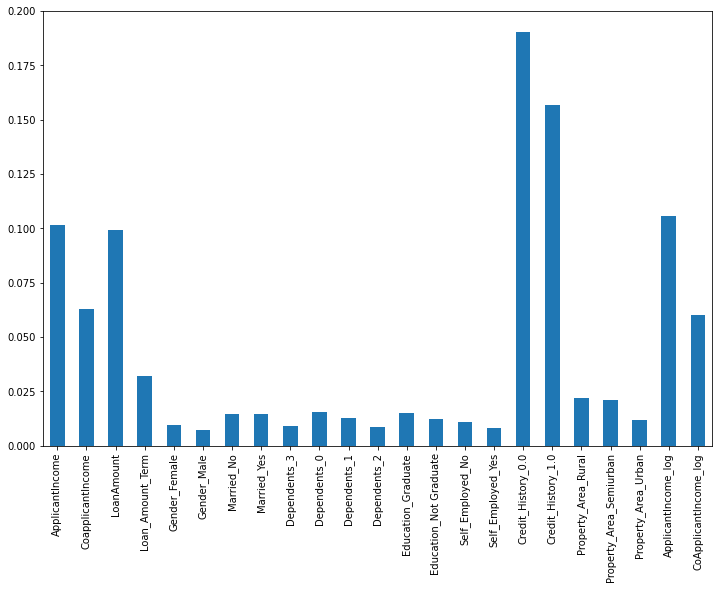

In [33]:
#Random Forest Classifier model using Stratified KFold
#------ ------ ---------- ----- ----- ---------- -----
pred_test=fit_model(X,y,test,model_name='Random Forest',maxdepth=10)

In [34]:
#Storing the results
#------- --- -------
submission=pd.read_csv('sample_submission_49d68Cx.csv')
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_orig['Loan_ID']
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)

timestamp=(re.findall('[0-9]+',str(time.time())))[0]
filename='submission_'+str(timestamp)+'.csv'

pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv(filename,index=False)
print("File named {} stored successfully".format(filename))

File named submission_1596117188.csv stored successfully
